In [11]:
from google.colab import drive

# This will prompt you to log in to your Google account to authorize access to Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
# List files available
print(os.listdir("/content/drive/MyDrive/Colab Notebooks/Projet 7/Input"))

['HomeCredit_columns_description.csv', 'application_test.csv', 'sample_submission.csv', 'application_train.csv']


In [13]:
# Training data
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Test data
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_test.csv')
print('Test data shape: ', app_test.shape)
app_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Evidently before any change

In [ ]:
!pip install evidently


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.1/530.1 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from evidently import ColumnMapping
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, DataQualityPreset


In [ ]:
app_train_drift = app_train.drop(columns=["TARGET"])

In [ ]:
# Création des rapports avant changements
data_drift_report = Report(metrics=[DataDriftPreset()])
data_quality_report = Report(metrics=[DataQualityPreset()])

try:
    # Calcul des rapports avec la cartographie des colonnes
    data_drift_report.run(reference_data=app_train_drift, current_data=app_test)
    data_quality_report.run(reference_data=app_train_drift, current_data=app_test)

except Exception as e:
    print(f"Erreur lors de l'exécution des rapports: {e}")

In [ ]:
data_drift_report.show()

In [ ]:
data_quality_report.show()

In [ ]:
# Enregistrement du rapport de dérive des données dans un fichier HTML
data_drift_report.save_html("/content/drive/MyDrive/Colab Notebooks/Projet 7/Output/data_drift_report.html")

# Enregistrement du rapport de qualité des données dans un fichier HTML
data_quality_report.save_html("/content/drive/MyDrive/Colab Notebooks/Projet 7/Output/data_quality_report.html")


## Examine the Distribution of the Target Column

In [ ]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

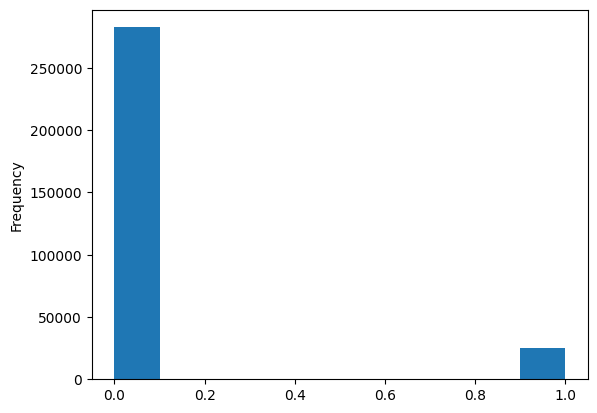

In [ ]:
app_train['TARGET'].astype(int).plot.hist(); # ajout du ; supprime une indication inutile sur le ylabel

## Examine Missing Values

In [14]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [15]:
# Missing values statistics
missing_values = missing_values_table(app_train)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


In [72]:
missing_values[missing_values["% of Total Values"]>48].shape

(48, 2)

In [ ]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [ ]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
# Number of unique classes in each object column
app_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

## Encoding Categorical Variables

In [17]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
  if app_train[col].dtype == 'object':
    # If 2 or fewer unique categories
    if len(list(app_train[col].unique())) <= 2:
      # Train on the training data
      le.fit(app_train[col])
      # Transform training and test
      app_train[col] = le.transform(app_train[col])

      # Keep track of how many columns were label encoded
      le_count += 1
      print('colonne:', col)

print('%d columns were label encoded.' % le_count)

colonne: NAME_CONTRACT_TYPE
colonne: FLAG_OWN_CAR
colonne: FLAG_OWN_REALTY
3 columns were label encoded.


In [ ]:
print(len(list(app_train['EMERGENCYSTATE_MODE'].unique()))) # comprend des vides donc n'a pas ete encode


3


In [ ]:
app_train['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [ ]:
app_train['NAME_EDUCATION_TYPE'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [18]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)

print('Training Features shape: ', app_train.shape)

Training Features shape:  (307511, 243)


In [19]:
# To be sure to have only 1 or 0
def bool_int(df):
  bool_columns = df.select_dtypes(include=['bool']).columns
  df[bool_columns] = df[bool_columns].astype(int)


In [20]:
bool_int(app_train)

In [21]:
cols_starting_with_education = [col for col in app_train.columns if col.startswith('NAME_EDUCATION_TYPE')]

app_train[cols_starting_with_education]


,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
307506,0,0,0,0,1
307507,0,0,0,0,1
307508,0,1,0,0,0
307509,0,0,0,0,1


## Back to Exploratory Data Analysis

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [ ]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

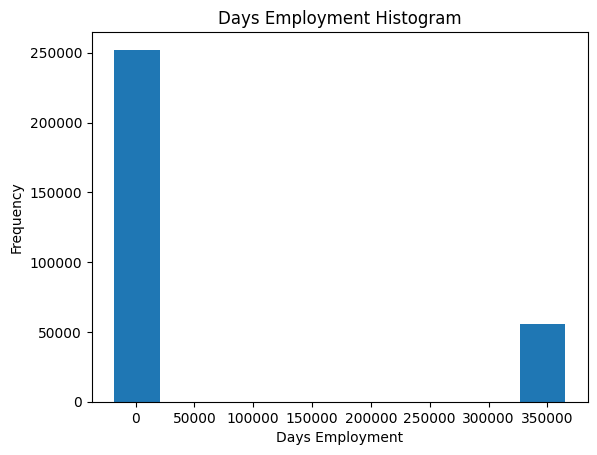

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Just out of curiousity, let's subset the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


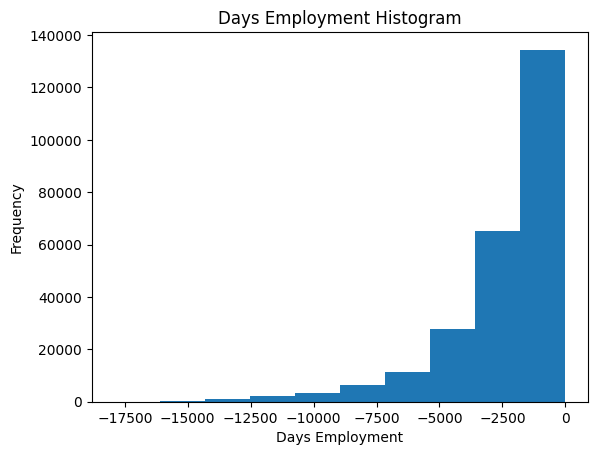

In [ ]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [ ]:
app_train['DAYS_EMPLOYED_ANOM'].value_counts()

DAYS_EMPLOYED_ANOM
False    252137
True      55374
Name: count, dtype: int64

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (because we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

## Correlations

Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

.00-.19 “very weak”

.20-.39 “weak”

.40-.59 “moderate”

.60-.79 “strong”

.80-1.0 “very strong”


In [22]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [23]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

As the client gets older, there is a negative linear relationship with the target meaning that as clients get older, they tend to repay their loans on time more often.

Let's start looking at this variable. First, we can make a histogram of the age. We will put the x axis in years to make the plot a little more understandable.

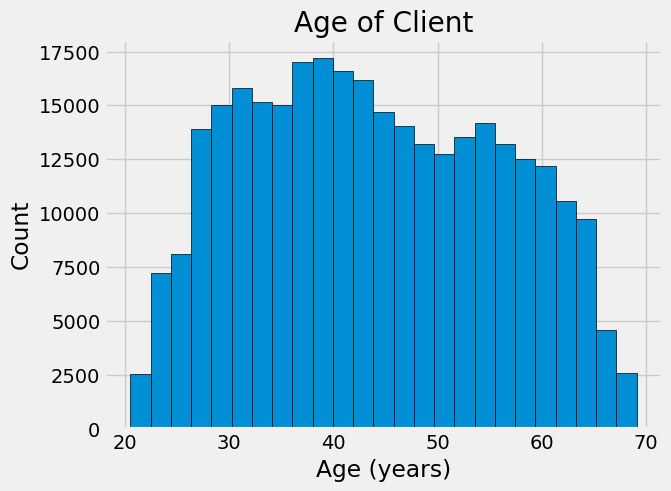

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');


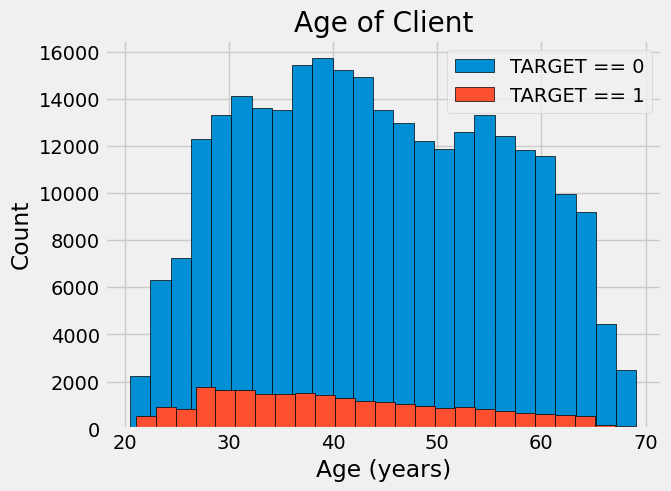

In [ ]:
# Tracer les histogrammes pour chaque ensemble de données
plt.hist(app_train[app_train['TARGET']==0]['DAYS_BIRTH'] / 365, edgecolor='k', bins=25, label='TARGET == 0')
plt.hist(app_train[app_train['TARGET']==1]['DAYS_BIRTH'] / 365, edgecolor='k', bins=25, label='TARGET == 1')

# Ajouter une légende avec les labels spécifiés
plt.legend()

# Ajouter un titre et des étiquettes d'axes
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

# Afficher le tracé
plt.show()


By itself, the distribution of age does not tell us much other than that there are no outliers as all the ages are reasonable. To visualize the effect of the age on the target, we will next make a kernel density estimation plot (KDE) colored by the value of the target. A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve). We will use the seaborn kdeplot for this graph.

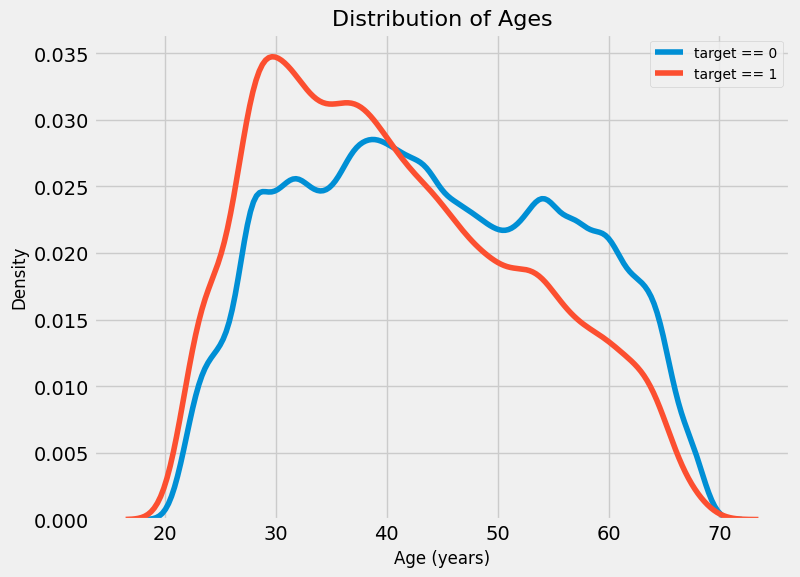

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))  # Définir la taille de la figure

# KDE plot des prêts remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label='target == 0')

# KDE plot des prêts qui n'ont pas été remboursés à temps
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label='target == 1')

# Réglage de la taille de la police pour le titre et les étiquettes
plt.xlabel('Age (years)', fontsize=12)  # Définir la taille de la police pour l'étiquette de l'axe x
plt.ylabel('Density', fontsize=12)  # Définir la taille de la police pour l'étiquette de l'axe y
plt.title('Distribution of Ages', fontsize=16)  # Définir la taille de la police pour le titre

# Ajout de la légende avec une taille de police personnalisée
plt.legend(fontsize=10)

# Affichage du tracé
plt.show()


The target == 1 curve skews towards the younger end of the range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in a machine learning model because it does affect the target. Let's look at this relationship in another way: average failure to repay loans by age bracket.

To make this graph, first we cut the age category into bins of 5 years each. Then, for each bin, we calculate the average value of the target, which tells us the ratio of loans that were not repaid in each age category.

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
...,...,...,...,...
307506,0,9327,25.553425,"(25.0, 30.0]"
307507,0,20775,56.917808,"(55.0, 60.0]"
307508,0,14966,41.002740,"(40.0, 45.0]"
307509,1,11961,32.769863,"(30.0, 35.0]"


In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


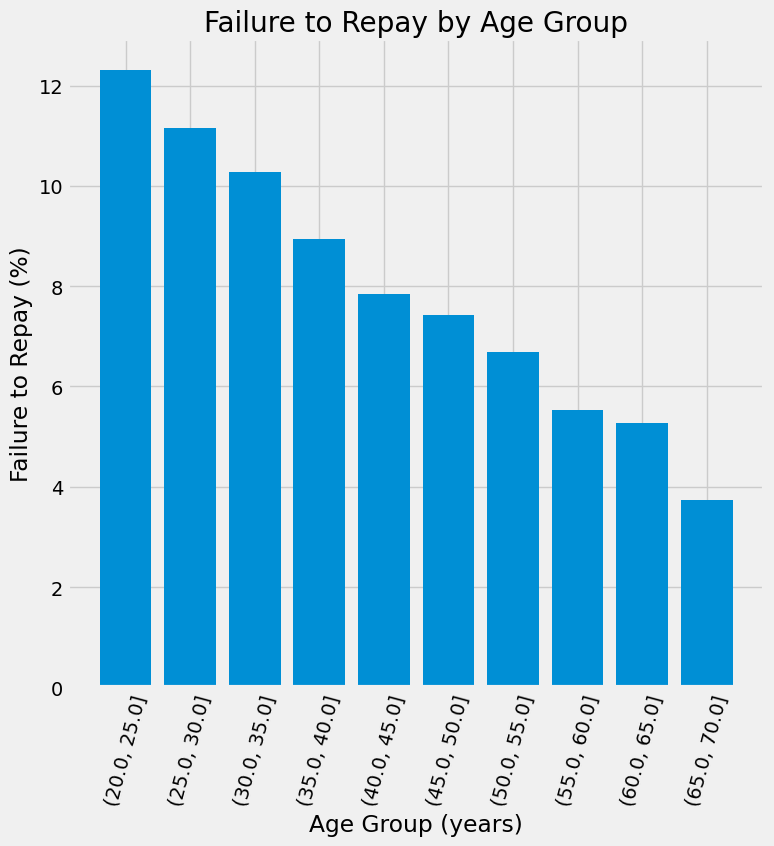

In [ ]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

### Exterior Sources
The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made using numerous sources of data.

Let's take a look at these variables.

First, we can show the correlations of the EXT_SOURCE features with the target and with each other.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


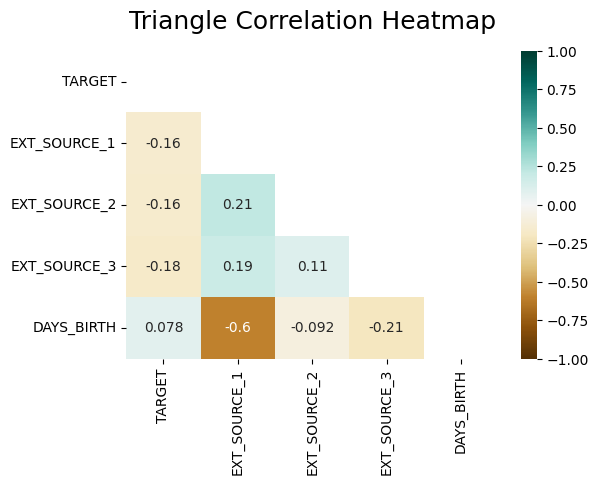

In [ ]:
# Matrice de correlation
plt.figure(figsize=(6, 4))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(ext_data_corrs, dtype=bool))
heatmap = sns.heatmap(ext_data_corrs, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

Next we can look at the distribution of each of these features colored by the value of the target. This will let us visualize the effect of this variable on the target.

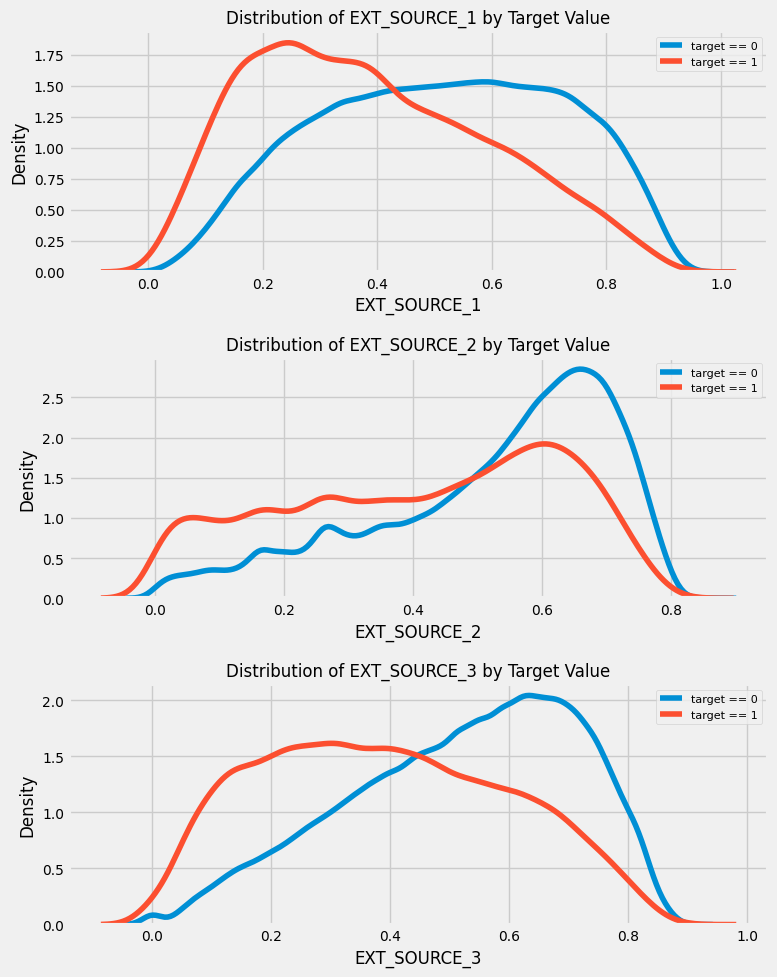

In [ ]:
plt.figure(figsize=(8, 10))

# Itérer à travers les sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # Créer un nouveau sous-tracé pour chaque source
    plt.subplot(3, 1, i + 1)

    # Tracer les prêts remboursés à temps
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label='target == 0')

    # Tracer les prêts qui n'ont pas été remboursés à temps
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label='target == 1')

    # Étiqueter les tracés avec une taille de police plus petite
    plt.title('Distribution of %s by Target Value' % source, fontsize=12)
    plt.xlabel('%s' % source, fontsize=12)
    plt.ylabel('Density', fontsize=12)

    # Ajuster la taille des chiffres sur les axes
    plt.tick_params(axis='both', labelsize=10)

    # Ajouter une légende
    plt.legend(fontsize=8)

# Ajuster automatiquement la disposition des sous-graphiques pour éviter les chevauchements
plt.tight_layout()

# Afficher le tracé
plt.show()


EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. The relationship is not very strong (in fact they are all considered very weak, but these variables will still be useful for a machine learning model to predict whether or not an applicant will repay a loan on time.

# Feature Engineering

## Polynomial features

In [24]:
# Sélection des lignes correspondantes aux champs 'EXT_SOURCE_1', 'EXT_SOURCE_2' et 'EXT_SOURCE_3' dans le dataframe des valeurs manquantes
missing_values.loc[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]


,Missing Values,% of Total Values
EXT_SOURCE_1,173378,56.4
EXT_SOURCE_2,660,0.2
EXT_SOURCE_3,60965,19.8


Mieux vaut ne pas considerer EXT_SOURCE_1 qui est vide a plus de 50%.

In [25]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [26]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 20)


This creates 20 new features. To get the names we have to use the polynomial features get_feature_names method.

In [27]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])



array(['1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2', 'EXT_SOURCE_2^3',
       'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2^2 DAYS_BIRTH',
       'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
       'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3',
       'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3 DAYS_BIRTH^2',
       'DAYS_BIRTH^3'], dtype=object)

There are 20 features with individual features raised to powers up to degree 3 and interaction terms. Now, we can see whether any of these new features are correlated with the target.

In [28]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features

,1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3^2,EXT_SOURCE_3 DAYS_BIRTH,DAYS_BIRTH^2,EXT_SOURCE_2^3,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2 DAYS_BIRTH^2,EXT_SOURCE_3^3,EXT_SOURCE_3^2 DAYS_BIRTH,EXT_SOURCE_3 DAYS_BIRTH^2,DAYS_BIRTH^3
0,1.0,0.262949,0.139376,9461.0,0.069142,0.036649,2487.756636,0.019426,1318.634256,89510521.0,0.018181,0.009637,654.152107,0.005108,346.733022,2.353667e+07,0.002707,183.785678,1.247560e+07,8.468590e+11
1,1.0,0.622246,0.535276,16765.0,0.387190,0.333073,10431.950422,0.286521,8973.906339,281065225.0,0.240927,0.207254,6491.237078,0.178286,5583.975307,1.748916e+08,0.153368,4803.518937,1.504475e+08,4.712058e+12
2,1.0,0.555912,0.729567,19046.0,0.309038,0.405575,10587.901540,0.532268,13895.327191,362750116.0,0.171798,0.225464,5885.942404,0.295894,7724.580288,2.016572e+08,0.388325,10137.567875,2.646504e+08,6.908939e+12
3,1.0,0.650442,0.535276,19005.0,0.423074,0.348166,12361.644326,0.286521,10172.925140,361190025.0,0.275185,0.226462,8040.528832,0.186365,6616.894625,2.349331e+08,0.153368,5445.325225,1.933364e+08,6.864416e+12
4,1.0,0.322738,0.535276,19932.0,0.104160,0.172754,6432.819536,0.286521,10669.126224,397284624.0,0.033616,0.055754,2076.117157,0.092471,3443.335521,1.282190e+08,0.153368,5710.929881,2.126570e+08,7.918677e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.681632,0.535276,9327.0,0.464623,0.364862,6357.585111,0.286521,4992.521588,86992929.0,0.316702,0.248701,4333.535804,0.195302,3403.064320,5.929720e+07,0.153368,2672.378236,4.656525e+07,8.113830e+11
307507,1.0,0.115992,0.535276,20775.0,0.013454,0.062088,2409.735313,0.286521,11120.364104,431600625.0,0.001561,0.007202,279.510194,0.033234,1289.874083,5.006225e+07,0.153368,5952.466801,2.310256e+08,8.966503e+12
307508,1.0,0.535722,0.218859,14966.0,0.286998,0.117248,8017.611736,0.047899,3275.445025,223981156.0,0.153751,0.062812,4295.209004,0.025661,1754.727146,1.199916e+08,0.010483,716.860892,4.902031e+07,3.352102e+12
307509,1.0,0.514163,0.661024,11961.0,0.264363,0.339874,6149.901495,0.436952,7906.502552,143065521.0,0.135926,0.174750,3162.050698,0.224665,4065.229651,7.355897e+07,0.288836,5226.384299,9.456968e+07,1.711207e+12


In [29]:
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)


Training data with polynomial features shape:  (307511, 263)


In [ ]:
app_train_poly[['DAYS_BIRTH_x','DAYS_BIRTH_y']]

,DAYS_BIRTH_x,DAYS_BIRTH_y
0,-9461,-9461.0
1,-16765,-16765.0
2,-19046,-19046.0
3,-19005,-19005.0
4,-19932,-19932.0
...,...,...
307506,-9327,-9327.0
307507,-20775,-20775.0
307508,-14966,-14966.0
307509,-11961,-11961.0


In [30]:
app_train_poly.rename(columns={'DAYS_BIRTH_x':'DAYS_BIRTH'}, inplace=True)
app_train_poly = app_train_poly.drop(columns = ['DAYS_BIRTH_y'])

In [31]:
app_train_poly.shape


(307511, 262)

In [ ]:
# Exporter la liste des colonnes vers un fichier texte
with open('/content/drive/MyDrive/Colab Notebooks/Projet 7/columns.txt', 'w') as f:
  for col in app_train_poly.columns:
    f.write(col + '\n')

In [ ]:
app_train_poly.filter(regex='_[xy]$')

""
0
1
2
3
4
...
307506
307507
307508
307509


In [32]:
# On ne garde que les EXT_SOURCE_* qui ont ete encodees

app_train_poly.rename(columns={'EXT_SOURCE_2_y':'EXT_SOURCE_2','EXT_SOURCE_3_y':'EXT_SOURCE_3'}, inplace=True)
app_train_poly = app_train_poly.drop(columns = ['EXT_SOURCE_2_x','EXT_SOURCE_3_x'])

In [38]:
# Find the correlations with the target
poly_corrs = app_train_poly.corr()['TARGET'].sort_values()
corr_df = pd.DataFrame(poly_corrs).reset_index()
corr_df.columns = ['Column', 'Correlation']
corr_df


,Column,Correlation
0,EXT_SOURCE_2 EXT_SOURCE_3,-0.193939
1,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,-0.181283
2,EXT_SOURCE_2^2 EXT_SOURCE_3,-0.176428
3,EXT_SOURCE_2 EXT_SOURCE_3^2,-0.172282
4,EXT_SOURCE_2,-0.160295
...,...,...
255,NAME_INCOME_TYPE_Working,0.057481
256,REGION_RATING_CLIENT,0.058899
257,REGION_RATING_CLIENT_W_CITY,0.060893
258,TARGET,1.000000


In [39]:
# Display most negative and most positive
print(corr_df.head(20))
print(corr_df.tail(20))

                                  Column  Correlation
0              EXT_SOURCE_2 EXT_SOURCE_3    -0.193939
1   EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    -0.181283
2            EXT_SOURCE_2^2 EXT_SOURCE_3    -0.176428
3            EXT_SOURCE_2 EXT_SOURCE_3^2    -0.172282
4                           EXT_SOURCE_2    -0.160295
5                EXT_SOURCE_2 DAYS_BIRTH    -0.156873
6                           EXT_SOURCE_3    -0.155892
7                           EXT_SOURCE_1    -0.155317
8                EXT_SOURCE_3 DAYS_BIRTH    -0.150109
9                         EXT_SOURCE_2^2    -0.149512
10             EXT_SOURCE_2^2 DAYS_BIRTH    -0.149313
11             EXT_SOURCE_3^2 DAYS_BIRTH    -0.141777
12                        EXT_SOURCE_3^2    -0.141662
13                        EXT_SOURCE_2^3    -0.140243
14             EXT_SOURCE_2 DAYS_BIRTH^2    -0.132839
15                        EXT_SOURCE_3^3    -0.128213
16             EXT_SOURCE_3 DAYS_BIRTH^2    -0.126950
17                          

In [42]:
missing_percentages = app_train_poly.isnull().mean() * 100
missing_df = pd.DataFrame(missing_percentages).reset_index()
missing_df.columns = ['Column', 'MissingPercentage']
missing_df

,Column,MissingPercentage
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,FLAG_OWN_CAR,0.0
4,FLAG_OWN_REALTY,0.0
...,...,...
255,EXT_SOURCE_2 DAYS_BIRTH^2,0.0
256,EXT_SOURCE_3^3,0.0
257,EXT_SOURCE_3^2 DAYS_BIRTH,0.0
258,EXT_SOURCE_3 DAYS_BIRTH^2,0.0


In [70]:
result_df[(abs(result_df['Correlation'])>0.03) & (result_df['MissingPercentage']>48)]

,Column,Correlation,MissingPercentage
7,EXT_SOURCE_1,-0.155317,56.381073
25,FLOORSMAX_AVG,-0.044003,49.760822
26,FLOORSMAX_MEDI,-0.043768,49.760822
27,FLOORSMAX_MODE,-0.043226,49.760822
32,ELEVATORS_AVG,-0.034199,53.295980
33,ELEVATORS_MEDI,-0.033863,53.295980
34,FLOORSMIN_AVG,-0.033614,67.848630
35,FLOORSMIN_MEDI,-0.033394,67.848630
37,LIVINGAREA_AVG,-0.032997,50.193326
38,LIVINGAREA_MEDI,-0.032739,50.193326


## Domain Knowledge Features

Domain Knowledge Features
Maybe it's not entirely correct to call this "domain knowledge" because I'm not a credit expert, but perhaps we could call this "attempts at applying limited financial knowledge". In this frame of mind, we can make a couple features that attempt to capture what we think may be important for telling whether a client will default on a loan. Here I'm going to use five features that were inspired by this script by Aguiar:

CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income

ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income

CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)

DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [ ]:
app_train_poly['CREDIT_INCOME_PERCENT'] = app_train_poly['AMT_CREDIT'] / app_train_poly['AMT_INCOME_TOTAL']
app_train_poly['ANNUITY_INCOME_PERCENT'] = app_train_poly['AMT_ANNUITY'] / app_train_poly['AMT_INCOME_TOTAL']
app_train_poly['CREDIT_TERM'] = app_train_poly['AMT_ANNUITY'] / app_train_poly['AMT_CREDIT']
app_train_poly['DAYS_EMPLOYED_PERCENT'] = app_train_poly['DAYS_EMPLOYED'] / app_train_poly['DAYS_BIRTH']


We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

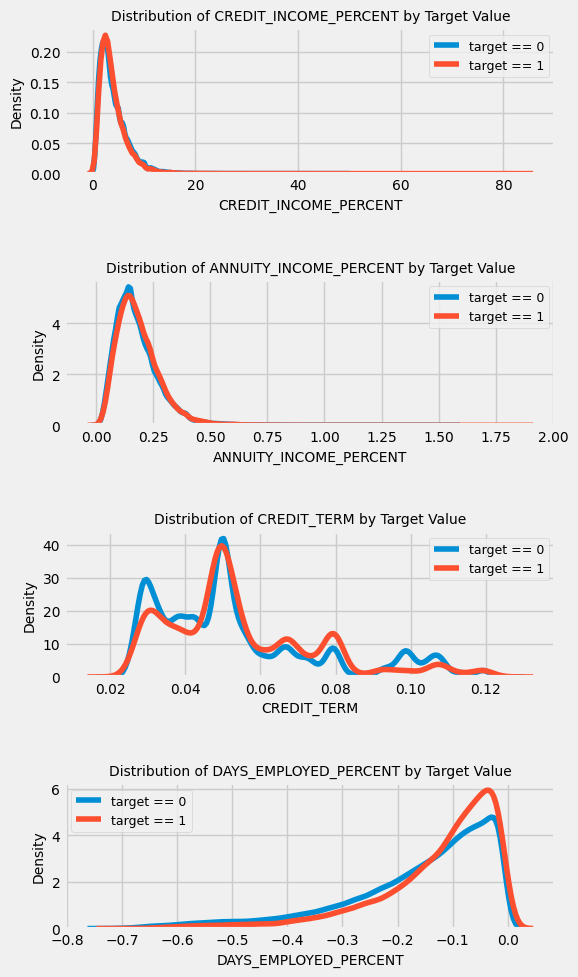

In [ ]:
plt.figure(figsize = (6, 10))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_poly.loc[app_train_poly['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_poly.loc[app_train_poly['TARGET'] == 1, feature], label = 'target == 1')

    # Ajuster la taille des chiffres sur les axes
    plt.tick_params(axis='both', labelsize=10)

    # Ajouter une légende
    plt.legend(fontsize=9)

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature, fontsize=10)
    plt.xlabel('%s' % feature, fontsize=10); plt.ylabel('Density', fontsize=10);

plt.tight_layout(h_pad = 2.5)

## Evidently after changes

In [ ]:
# On applique les memes changements sur les datasets de train et test pour etudier l'eventuel drifting des donnees
# Training data
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_train.csv')
# Test data
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_test.csv')

In [ ]:
#### METHODE REDONDANTE #####
# Create a label encoder object
le = LabelEncoder()
le_count = 0

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

# Iterate through the columns
for col in app_train:
  if app_train[col].dtype == 'object':
    # If 2 or fewer unique categories
    if len(list(app_train[col].unique())) <= 2:
      # Train on the training data
      le.fit(app_train[col])
      # Transform training and test
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      # Keep track of how many columns were label encoded
      le_count += 1
      print('colonne:', col)

print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# To be sure to have only 1 or 0
def bool_int(df):
  bool_columns = df.select_dtypes(include=['bool']).columns
  df[bool_columns] = df[bool_columns].astype(int)

bool_int(app_train)
bool_int(app_test)

app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
poly_features_test = app_test[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
#print('Polynomial Features shape: ', poly_features.shape)

poly_features_test = poly_transformer.transform(poly_features_test)
#print('Polynomial Features Test shape: ', poly_features_test.shape)

poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Create a dataframe of the features
poly_features_test = pd.DataFrame(poly_features_test,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polynomial features into test dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

app_train_poly.rename(columns={'DAYS_BIRTH_x':'DAYS_BIRTH'}, inplace=True)
app_train_poly = app_train_poly.drop(columns = ['DAYS_BIRTH_y'])

app_test_poly.rename(columns={'DAYS_BIRTH_x':'DAYS_BIRTH'}, inplace=True)
app_test_poly = app_test_poly.drop(columns = ['DAYS_BIRTH_y'])

# On ne garde que les EXT_SOURCE_* qui ont ete encodees

app_train_poly.rename(columns={'EXT_SOURCE_2_y':'EXT_SOURCE_2','EXT_SOURCE_3_y':'EXT_SOURCE_3'}, inplace=True)
app_train_poly = app_train_poly.drop(columns = ['EXT_SOURCE_2_x','EXT_SOURCE_3_x'])
app_test_poly.rename(columns={'EXT_SOURCE_2_y':'EXT_SOURCE_2','EXT_SOURCE_3_y':'EXT_SOURCE_3'}, inplace=True)
app_test_poly = app_test_poly.drop(columns = ['EXT_SOURCE_2_x','EXT_SOURCE_3_x'])

# Creation des variables metiers
app_train_poly['CREDIT_INCOME_PERCENT'] = app_train_poly['AMT_CREDIT'] / app_train_poly['AMT_INCOME_TOTAL']
app_train_poly['ANNUITY_INCOME_PERCENT'] = app_train_poly['AMT_ANNUITY'] / app_train_poly['AMT_INCOME_TOTAL']
app_train_poly['CREDIT_TERM'] = app_train_poly['AMT_ANNUITY'] / app_train_poly['AMT_CREDIT']
app_train_poly['DAYS_EMPLOYED_PERCENT'] = app_train_poly['DAYS_EMPLOYED'] / app_train_poly['DAYS_BIRTH']

app_test_poly['CREDIT_INCOME_PERCENT'] = app_test_poly['AMT_CREDIT'] / app_test_poly['AMT_INCOME_TOTAL']
app_test_poly['ANNUITY_INCOME_PERCENT'] = app_test_poly['AMT_ANNUITY'] / app_test_poly['AMT_INCOME_TOTAL']
app_test_poly['CREDIT_TERM'] = app_test_poly['AMT_ANNUITY'] / app_test_poly['AMT_CREDIT']
app_test_poly['DAYS_EMPLOYED_PERCENT'] = app_test_poly['DAYS_EMPLOYED'] / app_test_poly['DAYS_BIRTH']

def selectordrop_columns(df, columns_list, select_drop):
    """
    :param df: DataFrame à partir duquel sélectionner les colonnes
    :param columns_list: Liste des colonnes à sélectionner ou à supprimer
    :param select_drop: = 'select' ['drop'] when we want to select[drop] columns
    :return: DataFrame avec ou sans les colonnes listées
    """
    if select_drop not in ['select', 'drop']:
        raise ValueError("select_drop must be either 'select' or 'drop'")

    # Obtenir les colonnes communes entre le DataFrame et la liste des colonnes
    columns_common = [col for col in columns_list if col in df.columns]

    if select_drop=='select':
      return df.loc[:, columns_common]
    else:
      return df.drop(columns = columns_common)


# Missing values statistics
missing_values = missing_values_table(app_train_poly)

# Suppression des colonnes vides a plus de 48% (et on voit aussi que la correlation est faible pour celles ci)
Columns_to_drop = missing_values[missing_values['% of Total Values']>48].index.tolist()

app_train_refined = selectordrop_columns(app_train_poly, Columns_to_drop, 'drop')
app_test_refined = selectordrop_columns(app_test_poly, Columns_to_drop, 'drop')

# Find correlations with the target and sort
correlations = app_train_refined.corr()['TARGET'].sort_values()

# Selection pour recuperer les variables les plus correlees a la target
Columns_to_select = correlations[correlations.abs()>=0.01].index.tolist()
print("Columns_to_select :", Columns_to_select)

# Selection des colonnes de app_train_refined qui ont le plus de correlation
app_train_selected = selectordrop_columns(app_train_refined, Columns_to_select, 'select')
app_test_selected = selectordrop_columns(app_test_refined, Columns_to_select, 'select')

app_train_selected['SK_ID_CURR'] = app_train_refined['SK_ID_CURR']
app_test_selected['SK_ID_CURR'] = app_test_refined['SK_ID_CURR']

# Imputation par la mediane des autres variables avec valeurs manquantes

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

target_from_train = app_train_selected['TARGET']
#target_from_test = app_test_selected['TARGET'] # Pas de target dans le dataset de test

app_train_refined2 = app_train_selected.drop(columns = ['TARGET'])
#app_test_refined2 = app_test_selected.drop(columns = ['TARGET'])

# Need to impute missing values
app_train_imp = pd.DataFrame(imputer.fit_transform(app_train_refined2), columns=app_train_refined2.columns, index=app_train_refined2.index)
app_test_imp = pd.DataFrame(imputer.transform(app_test_selected), columns=app_test_selected.columns, index=app_test_selected.index)

print('Training Features shape after treatment: ', app_train_imp.shape)
print('Testing Features shape after treatment: ', app_test_imp.shape)

columns_diff = [col for col in app_train_imp.columns if col not in app_test_imp.columns]
print("Columns present in train and not in test:", columns_diff)

columns_diff_test = [col for col in app_test_imp.columns if col not in app_train_imp.columns]
print("Columns present in test and not in train:", columns_diff_test)



Training Features shape:  (307511, 122)
Testing Features shape:  (48744, 121)
colonne: NAME_CONTRACT_TYPE
colonne: FLAG_OWN_CAR
colonne: FLAG_OWN_REALTY
3 columns were label encoded.
Your selected dataframe has 265 columns.
There are 63 columns that have missing values.
Columns_to_select : ['EXT_SOURCE_2 EXT_SOURCE_3', 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_2^2 EXT_SOURCE_3', 'EXT_SOURCE_2 EXT_SOURCE_3^2', 'EXT_SOURCE_2', 'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3', 'EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_2^2', 'EXT_SOURCE_2^2 DAYS_BIRTH', 'EXT_SOURCE_3^2 DAYS_BIRTH', 'EXT_SOURCE_3^2', 'EXT_SOURCE_2^3', 'EXT_SOURCE_2 DAYS_BIRTH^2', 'EXT_SOURCE_3^3', 'EXT_SOURCE_3 DAYS_BIRTH^2', 'DAYS_BIRTH', 'DAYS_BIRTH^2', 'DAYS_BIRTH^3', 'NAME_EDUCATION_TYPE_Higher education', 'CODE_GENDER_F', 'NAME_INCOME_TYPE_Pensioner', 'ORGANIZATION_TYPE_XNA', 'DAYS_EMPLOYED_ANOM', 'EMERGENCYSTATE_MODE_No', 'HOUSETYPE_MODE_block of flats', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'WALLSMATERIAL_

In [ ]:
# Création des rapports apres changements
data_drift_report = Report(metrics=[DataDriftPreset()])

try:
    # Calcul des rapports avec la cartographie des colonnes
    data_drift_report.run(reference_data=app_train_imp, current_data=app_test_imp)

except Exception as e:
    print(f"Erreur lors de l'exécution des rapports: {e}")

In [ ]:
data_drift_report.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Enregistrement du rapport de dérive des données dans un fichier HTML
data_drift_report.save_html("/content/drive/MyDrive/Colab Notebooks/Projet 7/Output/data_drift_report_after_changes.html")

In [ ]:
# On applique les memes changements sur les datasets de train et test pour etudier l'eventuel drifting des donnees
# Training data
app_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_train.csv')

# Test data
app_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 7/Input/application_test.csv')

In [ ]:
#### METHODE AVEC FONCTION ####

import copy

def preprocess_data(dataset, dataset_type='train', **kwargs):
  # Vérifier le type de dataset
  if dataset_type not in ['train', 'test']:
    raise ValueError("dataset_type must be either 'train' or 'test'")

  ## Declaration de fonctions

  # Transformation des colonnes booléennes en int
  def bool_int(df):
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)

  # Selectionner ou suppression d'une liste de colonnes dans le dataframe
  def selectordrop_columns(df, columns_list, select_drop):
    """
    :param df: DataFrame à partir duquel sélectionner les colonnes
    :param columns_list: Liste des colonnes à sélectionner ou à supprimer
    :param select_drop: = 'select' ['drop'] when we want to select[drop] columns
    :return: DataFrame avec ou sans les colonnes listées
    """
    if select_drop not in ['select', 'drop']:
      raise ValueError("select_drop must be either 'select' or 'drop'")

    # Obtenir les colonnes communes entre le DataFrame et la liste des colonnes
    columns_common = [col for col in columns_list if col in df.columns]

    if select_drop=='select':
      return df.loc[:, columns_common]
    else:
      return df.drop(columns = columns_common)


  ## TRAITEMENT COMMUN AUX DEUX DATAFRAMES ##

  # Transformation de DAYS_BIRTH en valeurs absolues
  if 'DAYS_BIRTH' in dataset.columns:
    dataset['DAYS_BIRTH'] = abs(dataset['DAYS_BIRTH'])

  # Création d'une colonne pour les valeurs anormales de DAYS_EMPLOYED
  if 'DAYS_EMPLOYED' in dataset.columns:
    dataset['DAYS_EMPLOYED_ANOM'] = dataset["DAYS_EMPLOYED"] == 365243
    dataset['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

  # Calcul de nouvelles features
  if all(col in dataset.columns for col in ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY', 'DAYS_BIRTH']):
    dataset['CREDIT_INCOME_PERCENT'] = dataset['AMT_CREDIT'] / dataset['AMT_INCOME_TOTAL']
    dataset['ANNUITY_INCOME_PERCENT'] = dataset['AMT_ANNUITY'] / dataset['AMT_INCOME_TOTAL']
    dataset['CREDIT_TERM'] = dataset['AMT_ANNUITY'] / dataset['AMT_CREDIT']
    dataset['DAYS_EMPLOYED_PERCENT'] = dataset['DAYS_EMPLOYED'] / dataset['DAYS_BIRTH']

  # Creation du dataframe pour les variables polynomiales
  if all(col in dataset.columns for col in ['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']):
    poly_features = dataset[['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


  ## TRAITEMENT DIFFERENCIE ##

  if dataset_type == 'train':
    # Traitement du dataframe de Train
    # Initialiser les objets pour les transformations
    le = LabelEncoder()
    poly_imputer = SimpleImputer(strategy='median')
    poly_transformer = PolynomialFeatures(degree=3)
    imputer = SimpleImputer(strategy='median')

    fit_data = {'label_encoders': {}, 'poly_imputer': poly_imputer, 'poly_transformer': poly_transformer, 'imputer': imputer}

    # Encoder les colonnes catégorielles avec 2 catégories ou moins
    for col in dataset:
      if dataset[col].dtype == 'object' and len(list(dataset[col].unique())) <= 2:
        dataset[col] = le.fit_transform(dataset[col])

        deep_copy = copy.deepcopy(le)

        fit_data['label_encoders'][col] = deep_copy # Stocker le label encoder dans fit_data - dico {} initialise au dessus - on cree une deep copy pour eviter de tjs pointer sur le meme espace memoire modifie a chaque entrainement

    # Creation des variables polynomiales
    poly_features = poly_imputer.fit_transform(poly_features)
    poly_features = poly_transformer.fit_transform(poly_features)

    # Create a dataframe of the features
    poly_features_df = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

    fit_data['poly_features_names'] = poly_transformer.get_feature_names_out(input_features=['EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

    # One-hot encoding des variables catégorielles de plus de 2 categories dans le train
    list_col_get_dummies = []

    for col in dataset.columns.copy():
      if dataset[col].dtype == 'object' and len(list(dataset[col].unique())) > 2:
        print("One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col:", col )
        dataset = pd.get_dummies(dataset, columns=[col])
        list_col_get_dummies.append(col)

    fit_data['col_get_dummies'] = list_col_get_dummies
    print("Colonnes avec get_dummies:", list_col_get_dummies)

    bool_int(dataset)

  else:
    # Traitement du dataframe de Test
    fit_data = kwargs.get('fit_data', {})

    for col in fit_data['label_encoders'].keys():
      print(f"Encodage des colonnes du test de moins de 3 valeurs - colonne: {col}")
      le = fit_data['label_encoders'][col]
      print("liste:", list(le.classes_))

      dataset[col] = le.transform(dataset[col])

    poly_imputer = fit_data.get('poly_imputer')
    poly_features = poly_imputer.transform(poly_features)

    poly_transformer = fit_data.get('poly_transformer')
    poly_features = poly_transformer.transform(poly_features)

    # Créer un dataframe des features polynomial
    poly_features_df = pd.DataFrame(poly_features, columns=fit_data['poly_features_names'])

    for col in fit_data['col_get_dummies']:
      dataset = pd.get_dummies(dataset, columns=[col])

    bool_int(dataset)


  ## TRAITEMENT COMMUN APRES CREATION DES VARIABLES POLYNOMIALES ET ENCODAGE DES VARIABLES AVEC 1 OU 2 VALEURS UNIQUES ##

  # Fusionner les features polynomial avec le dataset original
  if 'SK_ID_CURR' in dataset.columns:
    poly_features_df['SK_ID_CURR'] = dataset['SK_ID_CURR']
    dataset = dataset.merge(poly_features_df, on='SK_ID_CURR', how='left')

    dataset.rename(columns={'DAYS_BIRTH_x':'DAYS_BIRTH','EXT_SOURCE_2_y':'EXT_SOURCE_2','EXT_SOURCE_3_y':'EXT_SOURCE_3'}, inplace=True)
    dataset = dataset.drop(columns = ['DAYS_BIRTH_y','EXT_SOURCE_2_x','EXT_SOURCE_3_x'])


  ## TRAITEMENT DIFFERENCIE (SUITE ET FIN) ##

  if dataset_type == 'train':
    sk_id_curr = dataset['SK_ID_CURR']
    missing_values = missing_values_table(dataset)

    # Identification des colonnes vides a plus de 48% pour suppression
    Columns_to_drop = missing_values[missing_values['% of Total Values']>48].index.tolist()
    dataset = selectordrop_columns(dataset, Columns_to_drop, 'drop')

    fit_data['columns_to_drop']=Columns_to_drop

    # Identification des colonnes avec correlation >= 0.01 pour selection
    correlations = dataset.corr()['TARGET'].sort_values()
    Columns_to_select = correlations[correlations.abs()>=0.01].index.tolist()
    dataset = selectordrop_columns(dataset, Columns_to_select, 'select')

    # Ajout de la colonne d'identifiant
    dataset['SK_ID_CURR'] = sk_id_curr

    fit_data['columns_to_select']=Columns_to_select

    print("dataset apres drop des colonnes vides et selection des correlees:", dataset.shape)
    print("fit_data:", fit_data)

    # Suppression de la target
    dataset = dataset.drop(columns='TARGET')

    dataf_columns = dataset.columns

    # Imputation par la mediane des autres variables avec valeurs manquantes
    dataset = imputer.fit_transform(dataset)

    dataset = pd.DataFrame(dataset, columns = dataf_columns)

    # Retourne le dataframe de Train et les modeles transformes avec les infos colonnes
    return dataset, fit_data

  else:
    sk_id_curr = dataset['SK_ID_CURR']
    dataset = selectordrop_columns(dataset, fit_data['columns_to_drop'], 'drop')
    dataset = selectordrop_columns(dataset, fit_data['columns_to_select'], 'select')
    dataset['SK_ID_CURR'] = sk_id_curr

    dataf_columns = dataset.columns

    imputer = fit_data.get('imputer')
    dataset = imputer.transform(dataset)

    dataset = pd.DataFrame(dataset, columns = dataf_columns)

    # Retourne le dataframe de Test
    return dataset

# Utilisation de la fonction pour les jeux de données de train et de test
app_train_processed, fit_data = preprocess_data(app_train, dataset_type='train')
app_test_processed = preprocess_data(app_test, dataset_type='test', fit_data=fit_data)


One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: CODE_GENDER
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: NAME_TYPE_SUITE
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: NAME_INCOME_TYPE
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: NAME_EDUCATION_TYPE
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: NAME_FAMILY_STATUS
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: NAME_HOUSING_TYPE
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: OCCUPATION_TYPE
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: WEEKDAY_APPR_PROCESS_START
One-hot encoding des variables catégorielles de plus de 2 categories dans le train. Col: ORGANIZATION_TYPE
One-hot encoding des variables catég

In [ ]:
# Création des rapports apres changements
data_drift_report = Report(metrics=[DataDriftPreset()])

try:
    # Calcul des rapports avec la cartographie des colonnes
    data_drift_report.run(reference_data=app_train_processed, current_data=app_test_processed)

except Exception as e:
    print(f"Erreur lors de l'exécution des rapports: {e}")

In [ ]:
data_drift_report.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
app_train_processed['TARGET']=app_train['TARGET']

In [ ]:
app_train_processed

,EXT_SOURCE_2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2 EXT_SOURCE_3,EXT_SOURCE_2 EXT_SOURCE_3^2,EXT_SOURCE_2,EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3,EXT_SOURCE_3 DAYS_BIRTH,EXT_SOURCE_2^2,EXT_SOURCE_2^2 DAYS_BIRTH,...,DAYS_ID_PUBLISH,CODE_GENDER_M,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE_Working,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,DAYS_EMPLOYED_PERCENT,DAYS_EMPLOYED,SK_ID_CURR,TARGET
0,0.036649,346.733022,0.009637,0.005108,0.262949,2487.756636,0.139376,1318.634256,0.069142,654.152107,...,-2120.0,1.0,-1134.0,1.0,2.0,2.0,-0.067329,-637.0,100002.0,1
1,0.333073,5583.975307,0.207254,0.178286,0.622246,10431.950422,0.535276,8973.906339,0.387190,6491.237078,...,-291.0,0.0,-828.0,0.0,1.0,1.0,-0.070862,-1188.0,100003.0,0
2,0.405575,7724.580288,0.225464,0.295894,0.555912,10587.901540,0.729567,13895.327191,0.309038,5885.942404,...,-2531.0,1.0,-815.0,1.0,2.0,2.0,-0.011814,-225.0,100004.0,0
3,0.348166,6616.894625,0.226462,0.186365,0.650442,12361.644326,0.535276,10172.925140,0.423074,8040.528832,...,-2437.0,0.0,-617.0,1.0,2.0,2.0,-0.159905,-3039.0,100006.0,0
4,0.172754,3443.335521,0.055754,0.092471,0.322738,6432.819536,0.535276,10669.126224,0.104160,2076.117157,...,-3458.0,1.0,-1106.0,1.0,2.0,2.0,-0.152418,-3038.0,100007.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.364862,3403.064320,0.248701,0.195302,0.681632,6357.585111,0.535276,4992.521588,0.464623,4333.535804,...,-1982.0,1.0,-273.0,1.0,1.0,1.0,-0.025303,-236.0,456251.0,0
307507,0.062088,1289.874083,0.007202,0.033234,0.115992,2409.735313,0.535276,11120.364104,0.013454,279.510194,...,-4090.0,0.0,0.0,0.0,2.0,2.0,-0.118733,-1648.0,456252.0,0
307508,0.117248,1754.727146,0.062812,0.025661,0.535722,8017.611736,0.218859,3275.445025,0.286998,4295.209004,...,-5150.0,0.0,-1909.0,1.0,3.0,3.0,-0.529266,-7921.0,456253.0,0
307509,0.339874,4065.229651,0.174750,0.224665,0.514163,6149.901495,0.661024,7906.502552,0.264363,3162.050698,...,-931.0,0.0,-322.0,0.0,2.0,2.0,-0.400134,-4786.0,456254.0,1


In [ ]:
# app_test_imp - dataframe cree par methode "redondante"
# app_test_processed - dataframe creer par methode avec fonction
# assurons nous que les deux sont bien strictement identiques

identiques = app_test_imp.equals(app_test_processed)

if identiques:
    print("Les deux DataFrames sont strictement identiques.")
else:
    print("Les deux DataFrames ne sont pas identiques.")

Les deux DataFrames sont strictement identiques.


# Final dataframe

In [ ]:
app_train_processed.to_csv("/content/drive/MyDrive/Colab Notebooks/Projet 7/Output/app_train_imp.csv", index=False)